
#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

/Users/jeremiebourdon/anaconda/lib/python3.5/site-packages/stochpy/modules/Analysis.py:124: RuntimeWarning: invalid value encountered in power
  D_moments[s_id]['4'] = (x**4*p_x).sum()


Expes for modele 1


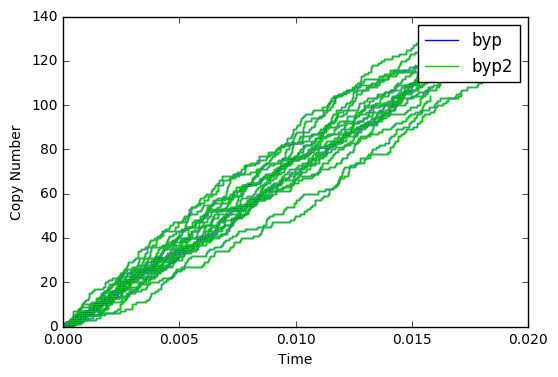

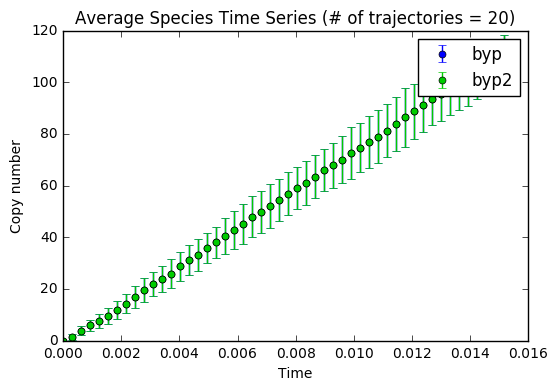

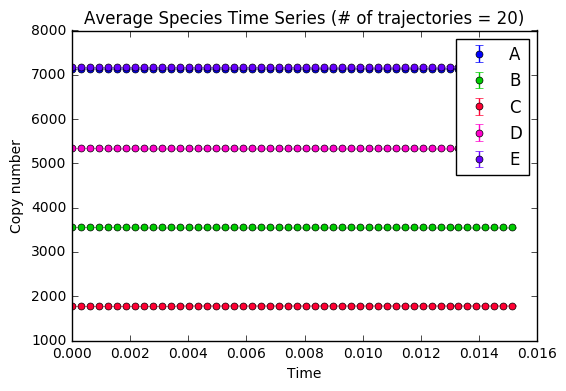

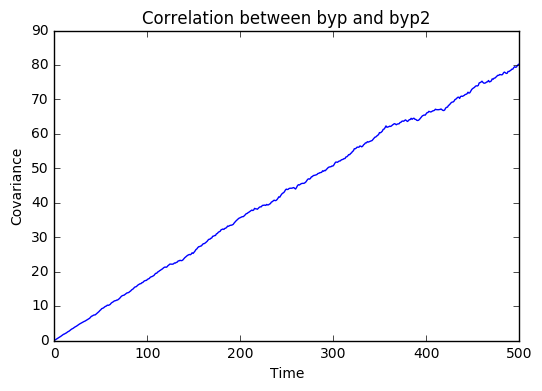

Expes for modele 2


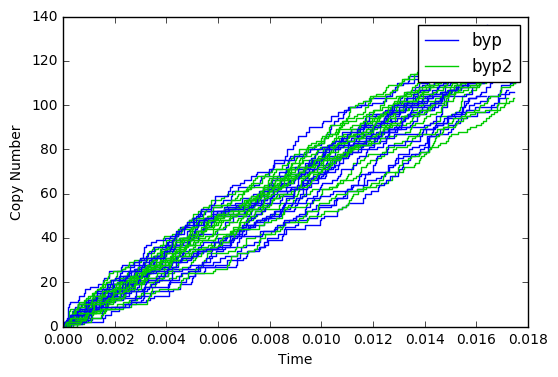

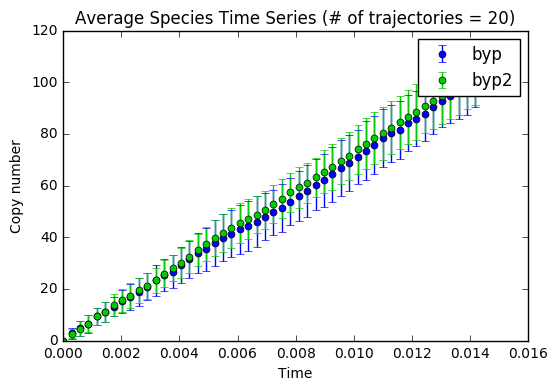

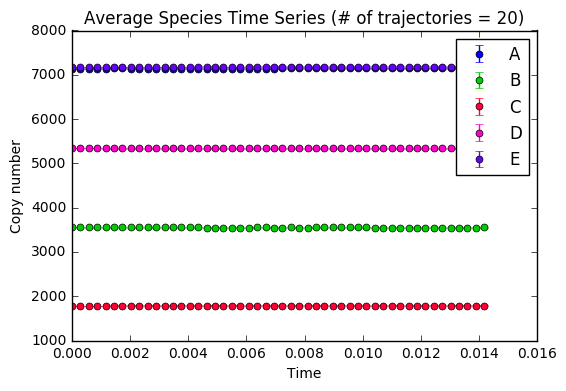

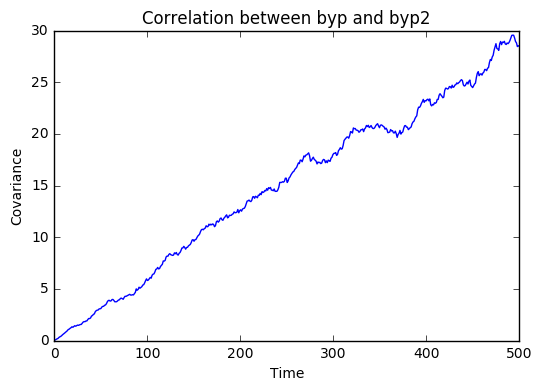

Expes for modele 3


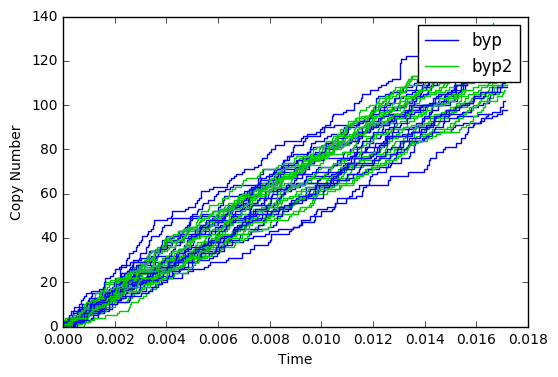

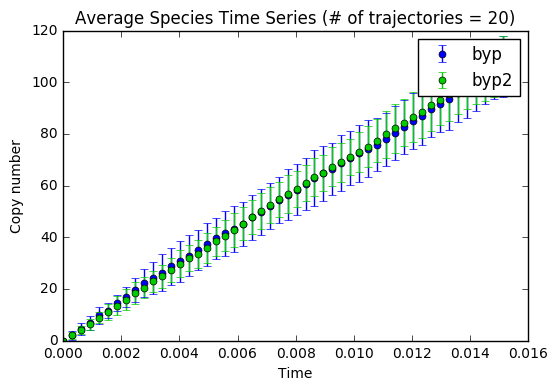

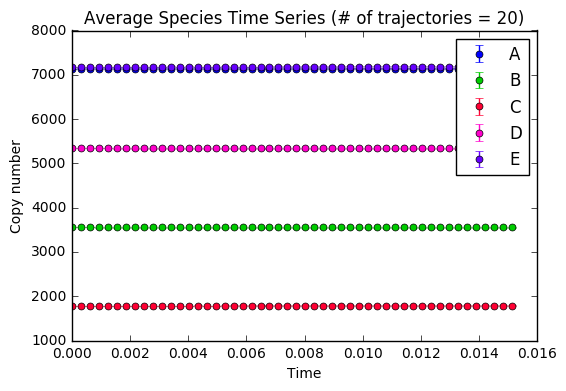

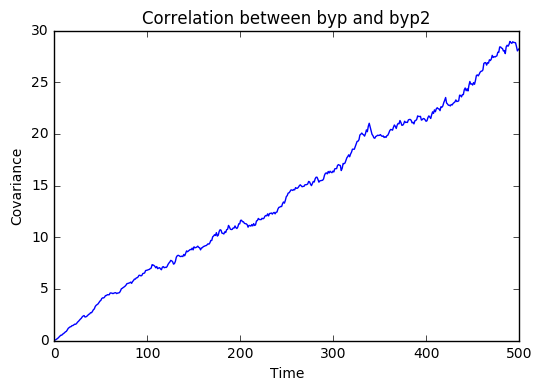

Expes for modele 4


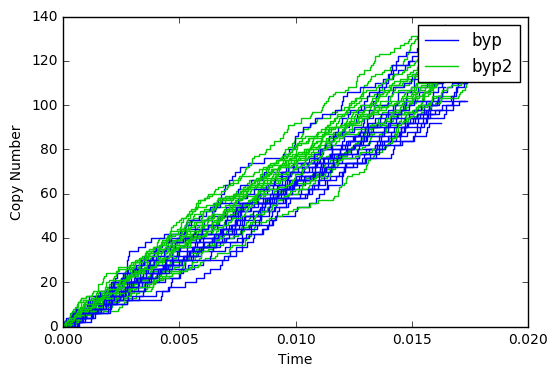

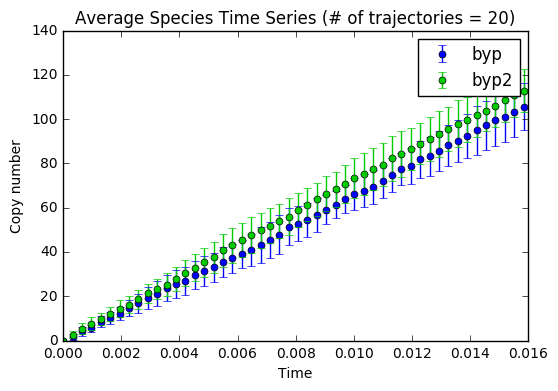

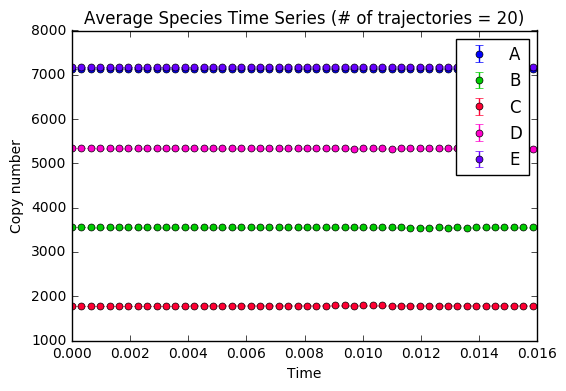

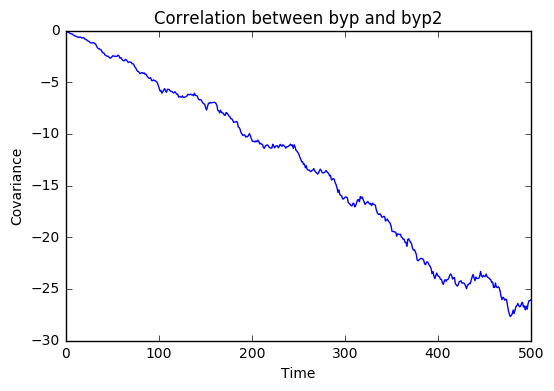

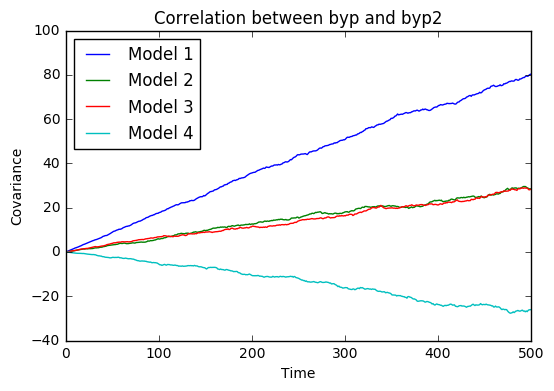

In [1]:
import stochpy
import numpy
import matplotlib.pyplot as plt

# determining the steady state values for A, B, C, D and E components

valuek2=1
valuek3=1

file = 'Modele4.psc'

smod = stochpy.SSA()
smod.model_dir = '../Models'
smod.Model(file)
smod.ChangeInitialSpeciesCopyNumber("A",5000)
smod.ChangeInitialSpeciesCopyNumber("B",5000)
smod.ChangeInitialSpeciesCopyNumber("C",5000)
smod.ChangeInitialSpeciesCopyNumber("D",5000)
smod.ChangeInitialSpeciesCopyNumber("E",5000)
smod.ChangeParameter("k2",valuek2)
smod.ChangeParameter("k3",valuek3)

smod.DoStochSim(mode='time', end=20,trajectories=1)

data=smod.data_stochsim.species
c1=data[:,smod.data_stochsim.species_labels.index('A')]
A0=numpy.mean(c1[int(3*len(c1)/4):len(c1)])
c1=data[:,smod.data_stochsim.species_labels.index('B')]
B0=numpy.mean(c1[int(3*len(c1)/4):len(c1)])
c1=data[:,smod.data_stochsim.species_labels.index('C')]
C0=numpy.mean(c1[int(3*len(c1)/4):len(c1)])
c1=data[:,smod.data_stochsim.species_labels.index('D')]
D0=numpy.mean(c1[int(3*len(c1)/4):len(c1)])
c1=data[:,smod.data_stochsim.species_labels.index('E')]
E0=numpy.mean(c1[int(3*len(c1)/4):len(c1)])




nb_trajectories=1000
gridsize=500

file = 'Modele1.psc'

smod = stochpy.SSA()
smod.model_dir = '../Models'
smod.Model(file)

# starting from a steady state
smod.ChangeInitialSpeciesCopyNumber("A",A0)
smod.ChangeInitialSpeciesCopyNumber("B",B0)
smod.ChangeInitialSpeciesCopyNumber("C",C0)
smod.ChangeInitialSpeciesCopyNumber("D",D0)
smod.ChangeInitialSpeciesCopyNumber("E",E0)
smod.ChangeParameter("k2",valuek2)
smod.ChangeParameter("k3",valuek3)



smod.DoStochSim(end=gridsize,trajectories=20)
smod.PlotSpeciesTimeSeries(species2plot=['byp','byp2'])
smod.GetRegularGrid(n_samples=50)
smod.PlotAverageSpeciesTimeSeries(species2plot=['byp','byp2'])
smod.PlotAverageSpeciesTimeSeries(species2plot=['A','B','C','D','E'])

# co-variance between byp and byp2
byp=smod.data_stochsim.species_labels.index('byp')
byp2=smod.data_stochsim.species_labels.index('byp2')

expesc1_100=numpy.empty([gridsize,nb_trajectories])
expesc2_100=numpy.empty([gridsize,nb_trajectories])

print ("Expes for modele 1")
for e in range (0,nb_trajectories):

    # starting from a steady state
    smod.ChangeInitialSpeciesCopyNumber("A",A0)
    smod.ChangeInitialSpeciesCopyNumber("B",B0)
    smod.ChangeInitialSpeciesCopyNumber("C",C0)
    smod.ChangeInitialSpeciesCopyNumber("D",D0)
    smod.ChangeInitialSpeciesCopyNumber("E",E0)
    smod.ChangeParameter("k2",valuek2)
    smod.ChangeParameter("k3",valuek3)

    smod.DoStochSim(end=gridsize,trajectories=1)
    # smod.GetRegularGrid(n_samples=gridsize)
    data=smod.data_stochsim.species
    c1=data[:,byp]
    c2=data[:,byp2]
    for i in range (0,gridsize):
        expesc1_100[i,e]=c1[i]
        expesc2_100[i,e]=c2[i]
v1=[numpy.cov(expesc1_100[x,:],expesc2_100[x,:])[0,1] for x in range(0,gridsize)]

plt.show()
plt.title('Correlation between byp and byp2')
plt.xlabel('Time')
plt.ylabel('Covariance')
plt.plot(numpy.linspace(0, gridsize, gridsize),v1)
plt.show()








file = 'Modele2.psc'

smod = stochpy.SSA()
smod.model_dir = '../Models'
smod.Model(file)

# starting from a steady state
smod.ChangeInitialSpeciesCopyNumber("A",A0)
smod.ChangeInitialSpeciesCopyNumber("B",B0)
smod.ChangeInitialSpeciesCopyNumber("C",C0)
smod.ChangeInitialSpeciesCopyNumber("D",D0)
smod.ChangeInitialSpeciesCopyNumber("E",E0)
smod.ChangeParameter("k2",valuek2)
smod.ChangeParameter("k3",valuek3)

smod.DoStochSim(end=gridsize,trajectories=20)
smod.PlotSpeciesTimeSeries(species2plot=['byp','byp2'])
smod.GetRegularGrid(n_samples=50)
smod.PlotAverageSpeciesTimeSeries(species2plot=['byp','byp2'])
smod.PlotAverageSpeciesTimeSeries(species2plot=['A','B','C','D','E'])

# co-variance between byp and byp2
byp=smod.data_stochsim.species_labels.index('byp')
byp2=smod.data_stochsim.species_labels.index('byp2')

expesc1_100=numpy.empty([gridsize,nb_trajectories])
expesc2_100=numpy.empty([gridsize,nb_trajectories])

print ("Expes for modele 2")
for e in range (0,nb_trajectories):

    # starting from a steady state
    smod.ChangeInitialSpeciesCopyNumber("A",A0)
    smod.ChangeInitialSpeciesCopyNumber("B",B0)
    smod.ChangeInitialSpeciesCopyNumber("C",C0)
    smod.ChangeInitialSpeciesCopyNumber("D",D0)
    smod.ChangeInitialSpeciesCopyNumber("E",E0)
    smod.ChangeParameter("k2",valuek2)
    smod.ChangeParameter("k3",valuek3)

    smod.DoStochSim(end=gridsize,trajectories=1)
    # smod.GetRegularGrid(n_samples=gridsize)
    data=smod.data_stochsim.species
    c1=data[:,byp]
    c2=data[:,byp2]
    for i in range (0,gridsize):
        expesc1_100[i,e]=c1[i]
        expesc2_100[i,e]=c2[i]
v2=[numpy.cov(expesc1_100[x,:],expesc2_100[x,:])[0,1] for x in range(0,gridsize)]

#data=smod.data_stochsim_grid.species
#v1=numpy.empty(500)
#for x in range(0,500):
#    c1=[t[x] for t in data[byp]]
#    c2=[t[x] for t in data[byp2]]
#    v1[x]=numpy.cov([c1,c2])[0,1]

plt.show()
plt.title('Correlation between byp and byp2')
plt.xlabel('Time')
plt.ylabel('Covariance')
plt.plot(numpy.linspace(0, gridsize, gridsize),v2)
plt.show()






file = 'Modele3.psc'

smod = stochpy.SSA()
smod.model_dir = '../Models'
smod.Model(file)

# starting from a steady state
smod.ChangeInitialSpeciesCopyNumber("A",A0)
smod.ChangeInitialSpeciesCopyNumber("B",B0)
smod.ChangeInitialSpeciesCopyNumber("C",C0)
smod.ChangeInitialSpeciesCopyNumber("D",D0)
smod.ChangeInitialSpeciesCopyNumber("E",E0)
smod.ChangeParameter("k2",valuek2)
smod.ChangeParameter("k3",valuek3)

smod.DoStochSim(end=gridsize,trajectories=20)
smod.PlotSpeciesTimeSeries(species2plot=['byp','byp2'])
smod.GetRegularGrid(n_samples=50)
smod.PlotAverageSpeciesTimeSeries(species2plot=['byp','byp2'])
smod.PlotAverageSpeciesTimeSeries(species2plot=['A','B','C','D','E'])

# co-variance between byp and byp2
byp=smod.data_stochsim.species_labels.index('byp')
byp2=smod.data_stochsim.species_labels.index('byp2')

expesc1_100=numpy.empty([gridsize,nb_trajectories])
expesc2_100=numpy.empty([gridsize,nb_trajectories])

print ("Expes for modele 3")
for e in range (0,nb_trajectories):

    # starting from a steady state
    smod.ChangeInitialSpeciesCopyNumber("A",A0)
    smod.ChangeInitialSpeciesCopyNumber("B",B0)
    smod.ChangeInitialSpeciesCopyNumber("C",C0)
    smod.ChangeInitialSpeciesCopyNumber("D",D0)
    smod.ChangeInitialSpeciesCopyNumber("E",E0)
    smod.ChangeParameter("k2",valuek2)
    smod.ChangeParameter("k3",valuek3)

    smod.DoStochSim(end=gridsize,trajectories=1)
    # smod.GetRegularGrid(n_samples=gridsize)
    data=smod.data_stochsim.species
    c1=data[:,byp]
    c2=data[:,byp2]
    for i in range (0,gridsize):
        expesc1_100[i,e]=c1[i]
        expesc2_100[i,e]=c2[i]
v3=[numpy.cov(expesc1_100[x,:],expesc2_100[x,:])[0,1] for x in range(0,gridsize)]

#data=smod.data_stochsim_grid.species
#v1=numpy.empty(500)
#for x in range(0,500):
#    c1=[t[x] for t in data[byp]]
#    c2=[t[x] for t in data[byp2]]
#    v1[x]=numpy.cov([c1,c2])[0,1]

plt.show()
plt.title('Correlation between byp and byp2')
plt.xlabel('Time')
plt.ylabel('Covariance')
plt.plot(numpy.linspace(0, gridsize, gridsize),v3)
plt.show()





file = 'Modele4.psc'

smod = stochpy.SSA()
smod.model_dir = '../Models'
smod.Model(file)
# starting from a steady state
smod.ChangeInitialSpeciesCopyNumber("A",A0)
smod.ChangeInitialSpeciesCopyNumber("B",B0)
smod.ChangeInitialSpeciesCopyNumber("C",C0)
smod.ChangeInitialSpeciesCopyNumber("D",D0)
smod.ChangeInitialSpeciesCopyNumber("E",E0)
smod.ChangeParameter("k2",valuek2)
smod.ChangeParameter("k3",valuek3)

smod.DoStochSim(end=gridsize,trajectories=20)


smod.PlotSpeciesTimeSeries(species2plot=['byp','byp2'])
smod.GetRegularGrid(n_samples=50)
smod.PlotAverageSpeciesTimeSeries(species2plot=['byp','byp2'])
smod.PlotAverageSpeciesTimeSeries(species2plot=['A','B','C','D','E'])

# co-variance between byp and byp2
byp=smod.data_stochsim.species_labels.index('byp')
byp2=smod.data_stochsim.species_labels.index('byp2')

expesc1_100=numpy.empty([gridsize,nb_trajectories])
expesc2_100=numpy.empty([gridsize,nb_trajectories])

print ("Expes for modele 4")
for e in range (0,nb_trajectories):
    # starting from a steady state
    smod.ChangeInitialSpeciesCopyNumber("A",A0)
    smod.ChangeInitialSpeciesCopyNumber("B",B0)
    smod.ChangeInitialSpeciesCopyNumber("C",C0)
    smod.ChangeInitialSpeciesCopyNumber("D",D0)
    smod.ChangeInitialSpeciesCopyNumber("E",E0)
    smod.ChangeParameter("k2",valuek2)
    smod.ChangeParameter("k3",valuek3)

    smod.DoStochSim(end=gridsize,trajectories=1)
    # smod.GetRegularGrid(n_samples=gridsize)
    data=smod.data_stochsim.species
    c1=data[:,byp]
    c2=data[:,byp2]
    for i in range (0,gridsize):
        expesc1_100[i,e]=c1[i]
        expesc2_100[i,e]=c2[i]
v4=[numpy.cov(expesc1_100[x,:],expesc2_100[x,:])[0,1] for x in range(0,gridsize)]

#data=smod.data_stochsim_grid.species
#v1=numpy.empty(500)
#for x in range(0,500):
#    c1=[t[x] for t in data[byp]]
#    c2=[t[x] for t in data[byp2]]
#    v1[x]=numpy.cov([c1,c2])[0,1]

plt.show()
plt.title('Correlation between byp and byp2')
plt.xlabel('Time')
plt.ylabel('Covariance')
plt.plot(numpy.linspace(0, gridsize, gridsize),v4)
plt.show()


plt.title('Correlation between byp and byp2')
plt.xlabel('Time')
plt.ylabel('Covariance')
fig1,=plt.plot(numpy.linspace(0, gridsize, gridsize),v1, label='Model 1')
fig2,=plt.plot(numpy.linspace(0, gridsize, gridsize),v2, label='Model 2')
fig3,=plt.plot(numpy.linspace(0, gridsize, gridsize),v3, label='Model 3')
fig4,=plt.plot(numpy.linspace(0, gridsize, gridsize),v4, label='Model 4')

plt.legend(handles=[fig1,fig2,fig3,fig4],loc=0)
plt.show()

